### Tuning Supervised Learners

#### Measures of Performance
##### Confusion matrix
Visualises the performance of a classification algorithm. Rows represent the items belonging to the actual classes, column represents the items belonging to the predicted classes.

Samples are categorised by being True/False Negatives/Positives (TN, FN, TP, FP). False positives are usually called a type 1 error, false negatives a type 2 error. There's usually a trade-off between the two, and which error you should be more concerned aout depends on the problem you're trying to solve.

##### Recall
A measure that indicates the ratio of positive test data items that are correctly identified out of all the items that are actually positive. Can be computed from the confusion matrix as $$Recall = \frac{TP}{TP + FN}$$

##### Precision
Measure that indicates ratio of the number of correctly predicted positive points to the number of all the points that were predicted as positive. $$Precision = \frac{TP}{TP + FP}$$

##### F-Measure
Take harmonic mean of precision and recall to give a general picture of the goodness of the classification model. Harmonic mean penalises the exteme values more and moves more toward the lower value of the two: $$F-Measure = \frac{2*Precision*Recall}{Precision+Recall}$$

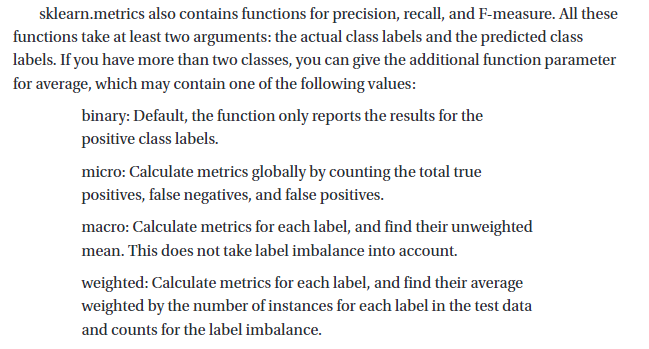


In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
iris_data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
iris_data['target'] = iris['target']
iris_data['target'] = iris_data['target'].apply(lambda x: iris['target_names'][x])
iris_data.shape

X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

DT_model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

DT_model_gini.fit(X_train, y_train)

y_pred = DT_model_gini.predict(X_test)
print(y_pred)

import sklearn.metrics

sklearn.metrics.confusion_matrix(y_test, y_pred)

p = sklearn.metrics.precision_score(y_test, y_pred, average='micro')
r = sklearn.metrics.recall_score(y_test, y_pred, average='micro')
f = sklearn.metrics.f1_score(y_test, y_pred, average='micro')
a = sklearn.metrics.accuracy_score(y_test, y_pred)

print("Here are the metrics for the trained model:")
print("Precision:\t{}\nRecall:\t{}\nF-score:\t{}\nAccuracy:\t{}".format(p,r,f,a))


['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']
Here are the metrics for the trained model:
Precision:	0.9666666666666667
Recall:	0.9666666666666667
F-score:	0.9666666666666667
Accuracy:	0.9666666666666667


In [ ]:
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



#### Cross Validation
We saw in the previous section that while approaching a supervised learning problem, we divide the labelled dataset into two components - the training set and validation set. Rather than relying on a static part of the data for training the model and using the other static part for validation, it is a good idea to come with a rotation of training and testing parts to be able to determine how well the model will generalise to an independent dataset.

We have a predefined ratio of test dataset, say 25%. In the first iteration, we consider the first part of the labelled data as test data and the remaining as training data. We then attain a set of metrics. We do the same for the 2nd fold. We repeat the process k times, where k is the number of folds that were thus created. This is called k-fold cross-validation.

Over k iterations, we will obtain k metrics, which can be averaged to find a more generalisable metric that can be used to tune the hyperparameters.

We cross-validate as if we tweak a model based on a static test set, it is possible to overoptimise and overfit on the test set which may not generalise to more unseen data.

In [13]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris['data'], columns = iris['feature_names'])
y=iris['target']

#fivefold cross validation to create multiple splits:

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)

# look at index of the elements that are chosen for training and testing in each iteration:

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print("Iteration" +str(i+1))
    print("Train Indices:", train_index, "\nTest Indices:", test_index, "\n")


Iteration1
Train Indices: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 
Test Indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29] 

Iteration2
Train Indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 1

In [ ]:
score_history = []
for train, test in kf.split(X, y):
    clf = DecisionTreeClassifier()
    clf.fit(X.values[train,:], y[train])
    score_history.append(clf.score(X.values[test,:], y_pred))

#Alternatively, can import cross_val_score.

[0.0, 0.0, 0.0, 0.0, 0.0]


##### ROC Curve
Various classification algorithms can be configured to produce a class label based on a predefined threshold on the probability of the data item belonging to a class. The classifier's predictions can strongly differ based on the threshold. This indirectly affects the precision and recall, sensitivity and specificity. Sensitivity, or recall, is the ratio of true positives and total positive data items. Specificity is the ratio of true negatives and all the data items that are actually negatives. Usually there is a tradeoff between the two.

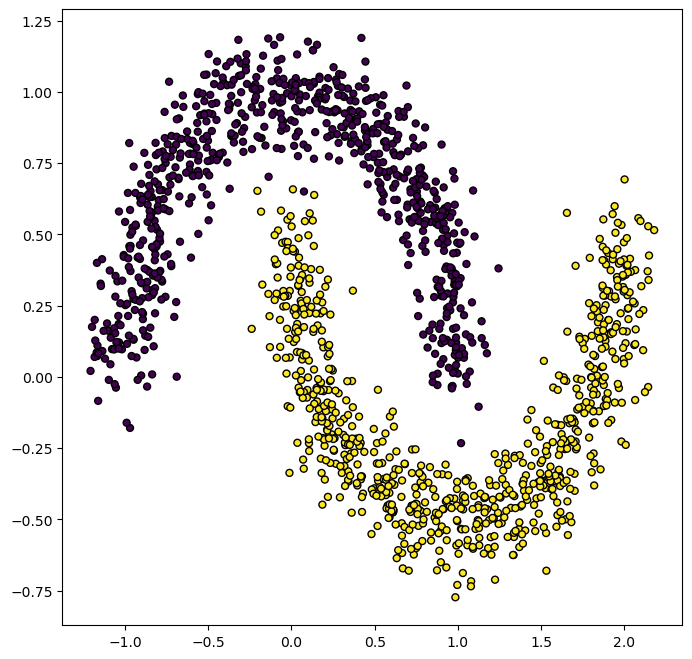

In [ ]:
#Generating a complex dataset

from sklearn.datasets import make_moons
X1, Y1 = make_moons(n_samples = 1500, shuffle=True, noise=0.1)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(X1[:,0], X1[:,1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()

In [38]:
#Generating a less complex dataset
"""
from sklearn.datasets import make_classification
x1, y1 = make_classification(n_classes=2, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class= 1)

plt.figure(figsize=(8,8))
plt.scatter(x1[:,0], x1[:,1], marker='o', c=y1, s=25, edgecolor='k')
plt.show()
"""

"\nfrom sklearn.datasets import make_classification\nx1, y1 = make_classification(n_classes=2, n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class= 1)\n\nplt.figure(figsize=(8,8))\nplt.scatter(x1[:,0], x1[:,1], marker='o', c=y1, s=25, edgecolor='k')\nplt.show()\n"

In [60]:
#train a logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state =3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [61]:
#call the predict_proba() method - produces each point belonging to the second class
logreg.predict_proba(X_test)

# gives an array of shape (20,2) - 20 test samples, the probability of each class is given in the two columns.
#ROC curve plots true positive rate vs false positive rate.

y_pred_proba = logreg.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

from sklearn.metrics import auc
auc(fpr,tpr)

0.9519054229546371

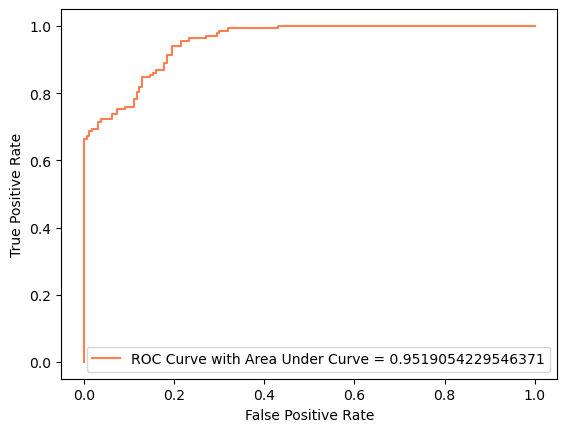

In [35]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label ='ROC Curve with Area Under Curve = '+str(auc(fpr,tpr)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

(-1.7734507205418644, 2.186549279458139)

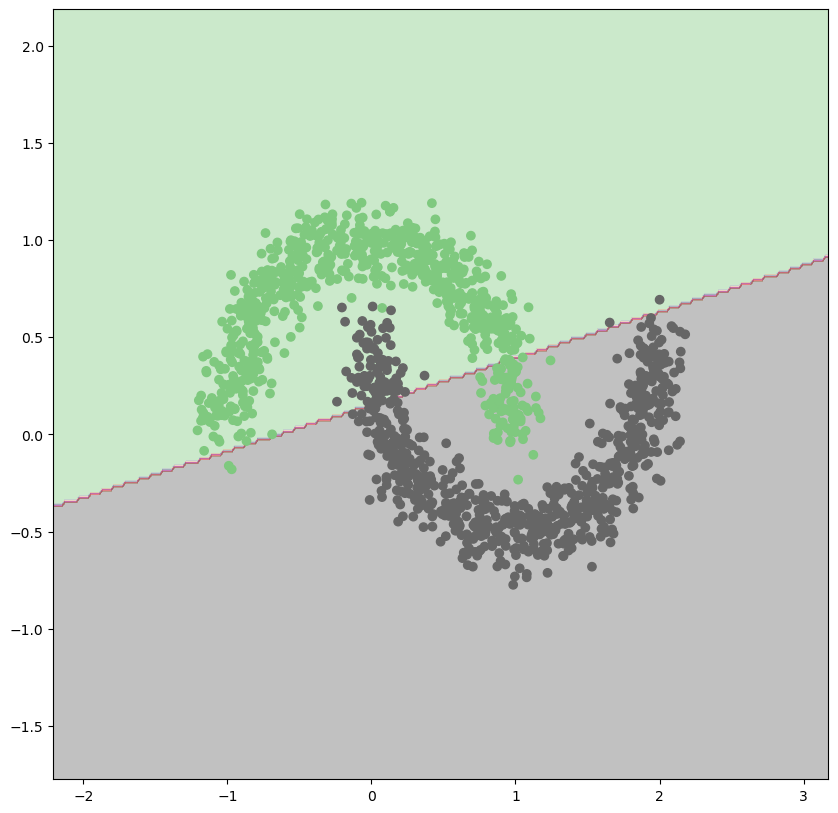

In [62]:
x_min, x_max = X1[:,0].min()-1, X1[:,0].max()+1
y_min, y_max = X1[:,1].min()-1, X1[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.rcParams['figure.figsize'] = (10,10)
plt.figure()
plt.contourf(xx,yy, Z, alpha=0.4, cmap='Accent')

plt.scatter(X1[:,0], X1[:,1], c=Y1, cmap='Accent')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

#### Overfitting and Regularisation
In polynomial regression, we are still using the linear regression methodologies to fit a line. However, this is done after expanding the independent variables into polynomial features.

(100, 1)


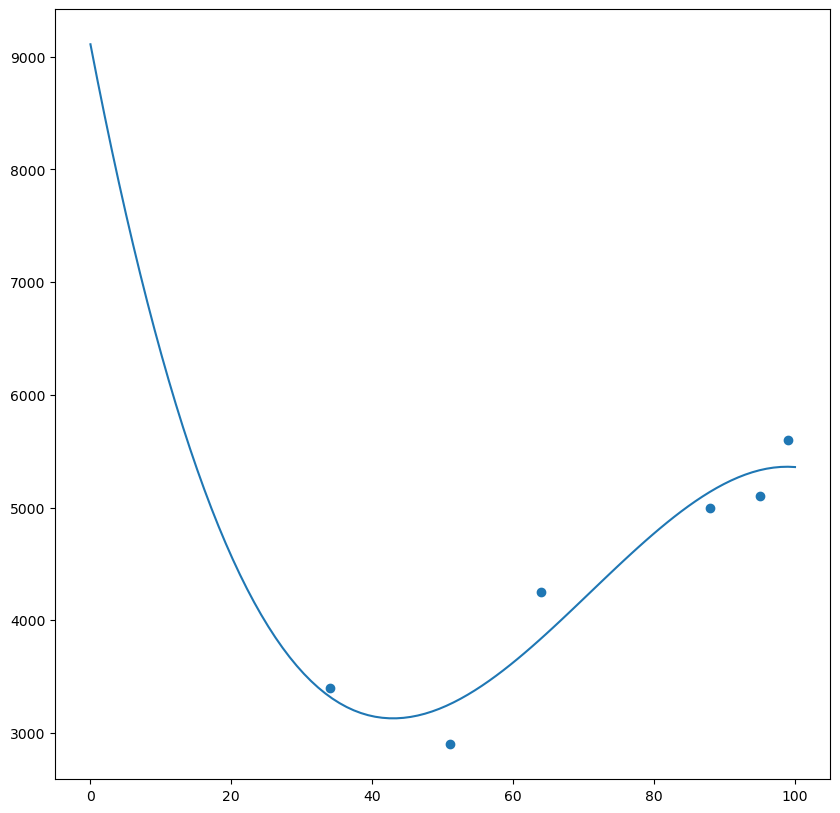

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
data = pd.DataFrame({"marks":[34,51,64,88,95,99], "salary":[3400,2900,4250,5000,5100,5600]})
X = data[['marks']].values
y=data['salary'].values
poly = PolynomialFeatures(3)
X2 = poly.fit_transform(X)
#New array X1 of shape (6,4) which are created from x^0, X^1,X^2, X^3

reg = LinearRegression()
reg.fit(X2, y)
X_seq = np.linspace(0,100, 100).reshape(-1,1)
print(X_seq.shape)
y_constant = np.array([(4500) for i in range(100)])
X_seq_1 = poly.fit_transform(X_seq)
y_seq = reg.predict(X_seq_1)

plt.figure()
plt.scatter(X,y)
plt.plot(X_seq, y_seq)
plt.show()

#Shows the overfitting of the model.
#We made the model more complex to fit the data too well.

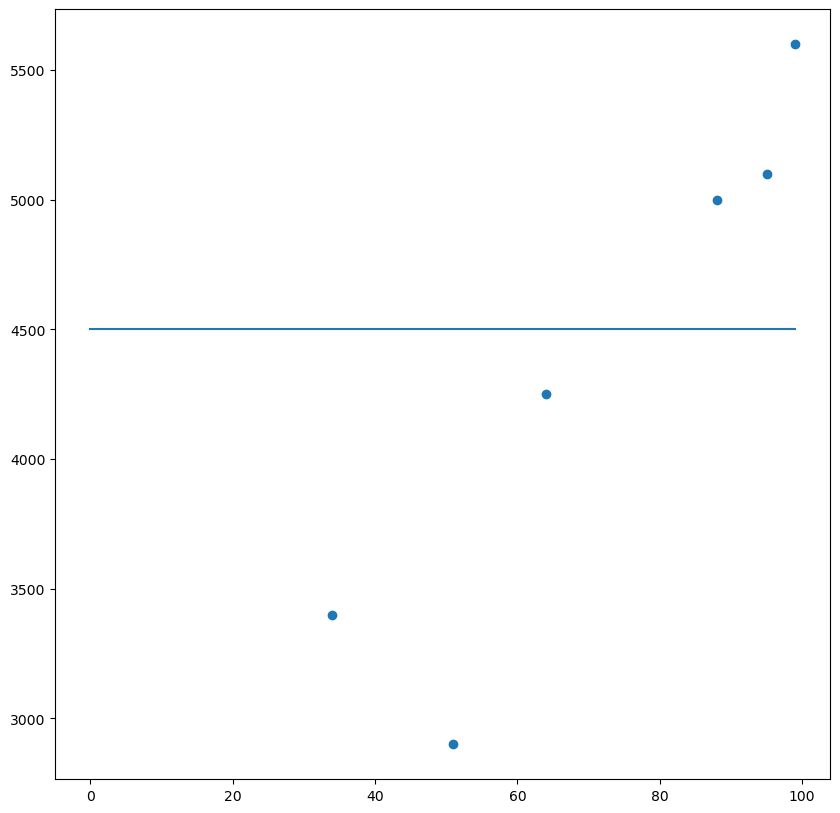

In [72]:
#Opposite is underfitting:
plt.figure()
plt.scatter(X,y)
plt.plot(y_constant)
plt.show()

#### Bias and Variance
